# Wordle Solver

Observing different data sets

In [133]:
import pandas as pd
import math
import random
import heapq
from itertools import product
import collections
import pickle


data = pd.read_csv('new_possible_words.txt')

df = pd.DataFrame(data)

words_list = df['Possible_words']

allowed_data = pd.read_csv('Allowed_words.txt')

all_df = pd.DataFrame(allowed_data)

allowed_words = all_df['Allowed']


In [134]:
game_words = words_list
words_list = set(words_list)
allowed_words = set(allowed_words)
n = len(words_list)
n

2315

In [135]:
chars = [0,1,2]
possible_results = []
for i in product(chars,repeat = 5):
    possible_results.append(i)

In [136]:
possible_results = [list(i) for i in possible_results]

This function is used to retrieve the list of words.

input: none

output: set of words

In [137]:
def get_words():
    data = pd.read_csv('possible_words.txt')
    df = pd.DataFrame(data)
    words = df['Possible_words']
    words = set(words)
    return words
    

0 - Grey
1 - Yellow
2 - Green

In [138]:
def wordle_output(value,answer):
    res = [0]*5
    count = collections.Counter(answer)
    for i in range(5):
        if value[i] == answer[i]:
            res[i] = 2
            count[value[i]] -= 1
    for i in range(5):
        if res[i] == 0 and value[i] in count and count[value[i]] != 0:
            count[value[i]] -= 1
            res[i] = 1
    return res



In [139]:
def information(value,result,words):
    new_possible_answers = set()
    for word in words:
        if wordle_output(value,word) == result:
            new_possible_answers.add(word)
    prob = len(new_possible_answers)/len(words)
    if prob != 0:
        info = (-1)*(math.log2(prob))
    return prob,new_possible_answers              

In [140]:
def expected_information(value,words):
    ent = 0
    for result in possible_results:
        prob,lex = information(value,result,words)
        if prob != 0:
            ent += (-1)*prob*(math.log2(prob))
    return ent      

In [141]:
def next_guess(words):
    possible_guesses = set()
    ent_all_words = collections.defaultdict(set)
    minHeap = []
    if len(words) == 1:
        return words.pop()
    for w in words_list:
        ent = expected_information(w,words)
        ent = round(ent,3)
        ent_all_words[ent].add(w)
        heapq.heappush(minHeap, -ent)
    e = heapq.heappop(minHeap)
    g = words & ent_all_words[-e]
    if g: return g.pop()
    return ent_all_words[-e].pop()


In [47]:
# best = []
# for w in words_list:
#     best.append((expected_information(w,words_list),w))


In [48]:
# best.sort(reverse = True)
# best

[(5.8779096908214905, 'raise'),
 (5.855775376955974, 'slate'),
 (5.834874004263529, 'crate'),
 (5.831396980440793, 'irate'),
 (5.830548713859451, 'trace'),
 (5.820939700886009, 'arise'),
 (5.807280035160933, 'stare'),
 (5.770088860457013, 'snare'),
 (5.767796702404358, 'arose'),
 (5.751645645679275, 'least'),
 (5.74583655094462, 'alert'),
 (5.742781744697191, 'crane'),
 (5.7385726717905, 'stale'),
 (5.733713267350097, 'saner'),
 (5.713170728077574, 'alter'),
 (5.706088957294794, 'later'),
 (5.696353951200051, 'react'),
 (5.684573501404138, 'leant'),
 (5.6815608695825155, 'trade'),
 (5.656074382048378, 'learn'),
 (5.646714898485088, 'cater'),
 (5.6451934500610745, 'roast'),
 (5.636827622829476, 'aisle'),
 (5.634236581503799, 'trice'),
 (5.630489493703493, 'scare'),
 (5.6296910035901, 'parse'),
 (5.620200903567962, 'saute'),
 (5.614518956629301, 'heart'),
 (5.614035882733979, 'alone'),
 (5.610465734674024, 'store'),
 (5.6095337891796975, 'alien'),
 (5.608309347595913, 'share'),
 (5.60408

In [130]:
# look_up = {}
# for result in possible_results:
#     prob,words = information('raise',result,words_list)
#     if len(words) > 0:
#         guess = next_guess(words)
#         look_up[tuple(result)] = [guess,words]

    

['mulch', {'dumpy', 'hutch', 'hunch', 'pygmy', 'polyp', 'coyly', 'howdy', 'folly', 'thong', 'gloom', 'moody', 'thump', 'gummy', 'mummy', 'buggy', 'foggy', 'ought', 'tough', 'clung', 'month', 'gulch', 'botch', 'gully', 'booby', 'puppy', 'would', 'fluff', 'lofty', 'nobly', 'dutch', 'cloth', 'fully', 'oddly', 'flock', 'phony', 'duchy', 'plumb', 'doubt', 'dodgy', 'moldy', 'photo', 'vouch', 'mulch', 'chuck', 'jumbo', 'blood', 'cloud', 'comfy', 'couch', 'mouth', 'found', 'clown', 'lumpy', 'wooly', 'donut', 'thumb', 'downy', 'butch', 'flout', 'whoop', 'clock', 'blond', 'conch', 'clump', 'bunch', 'puffy', 'buddy', 'poppy', 'lynch', 'flunk', 'plump', 'booth', 'bough', 'flung', 'wound', 'could', 'dowdy', 'humph', 'knoll', 'lunch', 'nylon', 'dummy', 'hunky', 'colon', 'young', 'notch', 'funky', 'nymph', 'bongo', 'junto', 'bunny', 'goofy', 'blunt', 'pudgy', 'putty', 'touch', 'woozy', 'chock', 'godly', 'outdo', 'nutty', 'pooch', 'lowly', 'clout', 'knock', 'holly', 'condo', 'pulpy', 'jumpy', 'pouty',

['exist', {'exist', 'heist'}]
['noise', {'guise', 'noise', 'poise'}]
['clout', {'aptly', 'chaff', 'quota', 'float', 'abbot', 'coach', 'aunty', 'champ', 'allot', 'clang', 'loyal', 'tonga', 'aback', 'thank', 'octal', 'cocoa', 'human', 'cloak', 'nomad', 'modal', 'knack', 'along', 'foamy', 'local', 'apply', 'allow', 'aloud', 'gloat', 'alloy', 'among', 'polka', 'mocha', 'quack', 'twang', 'whack', 'blank', 'afoot', 'chant', 'awful', 'adapt', 'gonad', 'annoy', 'aloft', 'plank', 'clack', 'chalk', 'topaz', 'aglow', 'flank', 'pupal', 'tonal', 'koala', 'offal', 'gland', 'album', 'today', 'amply', 'tubal', 'allay', 'adult', 'junta', 'atoll', 'black', 'bland', 'annul', 'about', 'woman', 'plant', 'flack', 'dogma', 'loamy', 'adopt', 'loath', 'alpha', 'focal', 'zonal', 'vodka', 'vocal', 'clamp', 'aloof', 'bylaw', 'clank', 'comma', 'total', 'bloat', 'plaza', 'flaky', 'qualm', 'agony', 'afoul', 'llama', 'guava'}]
['cleat', {'fecal', 'decay', 'fetal', 'clean', 'abbey', 'omega', 'beady', 'equal', 'annex',

['sheep', {'steer', 'stern', 'sperm', 'screw', 'usher', 'sewer', 'sober', 'sneer', 'sheer', 'poser', 'sower', 'super', 'shrew', 'ester', 'sever', 'loser', 'serum', 'surer'}]
['perch', {'score', 'surge', 'swore', 'scree', 'snore', 'spore', 'shore', 'spree', 'serve', 'store'}]
['count', {'crush', 'frost', 'torso', 'trust', 'worst', 'gross', 'dross', 'crust', 'tryst', 'cross', 'brush', 'burst', 'truss'}]
['crypt', {'press', 'fresh', 'dress', 'cress', 'crest', 'wrest', 'verso'}]
['pouch', {'horse', 'purse', 'prose', 'terse', 'nurse', 'curse', 'verse', 'worse'}]
['thong', {'groin', 'curio', 'ivory', 'broil', 'fruit', 'incur', 'dirty', 'micro', 'druid', 'lurid', 'girly', 'droit', 'mirth', 'choir', 'girth', 'irony', 'vigor', 'intro', 'orbit', 'lyric', 'birth', 'birch', 'minor'}]
['vinyl', {'inner', 'fiber', 'their', 'miner', 'cider', 'filer', 'merit', 'infer', 'viper', 'idler', 'inter', 'peril', 'wider', 'fixer', 'liner', 'liver', 'diner', 'giver', 'fiery', 'finer', 'inert', 'tiger', 'diver',

['groin', {'bride', 'phone', 'drove', 'prove', 'purge', 'rhyme', 'hedge', 'booze', 'gnome', 'curve', 'ridge', 'niece', 'eerie', 'wince', 'rogue', 'undue', 'borne', 'pique', 'voice', 'rupee', 'queue', 'force', 'deuce', 'pride', 'urine', 'rouge', 'hinge', 'prime', 'genie', 'dodge', 'horde', 'binge', 'ovine', 'penne', 'probe', 'pence', 'whine', 'evoke', 'choke', 'femme', 'chore', 'oxide', 'drive', 'verge', 'froze', 'diode', 'juice', 'ozone', 'guide', 'nudge', 'ounce', 'fugue', 'nerve', 'where', 'niche', 'chide', 'crime', 'fence', 'grope', 'wedge', 'prune', 'brine', 'budge', 'mince', 'puree', 'crepe', 'bribe', 'emcee', 'midge', 'gorge', 'grove', 'merge', 'broke', 'venue', 'imbue', 'crude', 'fibre', 'price', 'gouge', 'piece', 'opine', 'drone', 'dunce', 'biome', 'grime', 'prone', 'movie', 'knife', 'verve', 'erode', 'vogue', 'fudge', 'crone', 'pixie', 'coupe', 'prude', 'forge', 'gripe', 'revue', 'hence', 'chime', 'genre', 'dirge', 'ombre', 'prize', 'judge', 'creme'}]
['count', {'hutch', 'cryp

['renew', {'libel', 'lower', 'relic', 'revel', 'repel', 'hovel', 'kneel', 'impel', 'filer', 'vowel', 'below', 'leggy', 'yield', 'dwell', 'model', 'golem', 'cello', 'rebel', 'idler', 'jewel', 'belch', 'bevel', 'expel', 'felon', 'leech', 'newly', 'peril', 'ruler', 'leper', 'lemur', 'liner', 'liver', 'leery', 'reply', 'jelly', 'lover', 'whelp', 'linen', 'hello', 'pixel', 'excel', 'field', 'lemon', 'bowel', 'bezel', 'novel', 'level', 'lumen', 'quell', 'cruel', 'wield', 'wheel', 'melon', 'helix', 'welch', 'belly', 'gruel', 'dowel', 'devil', 'liken', 'lever'}]
['bingo', {'belie', 'lunge', 'bible', 'noble', 'guile', 'liege', 'boule', 'bulge', 'melee', 'bilge', 'belle', 'exile', 'cycle', 'uncle', 'delve', 'whole', 'while', 'bugle', 'lodge', 'ledge', 'rifle'}]
['ought', {'troll', 'guilt', 'hotly', 'light', 'built', 'until', 'twirl', 'moult', 'truly', 'quilt', 'unlit', 'tulip', 'limit', 'pilot'}]
['wheel', {'towel', 'filet', 'betel', 'hotel', 'dwelt', 'exult', 'motel', 'knelt', 'inlet', 'extol'}

['input', {'steer', 'stern', 'sheet', 'stein', 'steep', 'sweet', 'spent', 'steed', 'swept', 'scent', 'setup'}]
['never', {'stove', 'store', 'stone', 'stoke'}]
['proxy', {'smith', 'sooty', 'south', 'sixty', 'sixth', 'sooth'}]
['spout', {'smote', 'smite', 'spite', 'suite'}]
['curvy', {'savvy', 'saucy', 'scuba', 'sonar', 'squad', 'savor', 'sassy', 'sandy', 'sigma', 'sumac', 'scrap', 'savoy', 'sugar', 'spray', 'sauna', 'scram', 'sappy'}]
['sperm', {'shear', 'saner', 'safer', 'swear', 'sepia', 'speak', 'spear', 'sneak', 'smear', 'sedan'}]
['sauce', set()]
['privy', {'strap', 'satin', 'straw', 'satyr', 'saint', 'stray', 'squat'}]
['midst', {'stead', 'steam', 'steak', 'sweat'}]
['saute', set()]
['nymph', {'scarf', 'shady', 'shank', 'smack', 'shard', 'smash', 'sharp', 'soapy', 'shaky', 'swash', 'swarm', 'shark', 'scary', 'snaky', 'spank', 'swami', 'snack', 'spark', 'swamp', 'scamp', 'spasm', 'spawn', 'shack'}]
['chirp', {'scare', 'spade', 'shame', 'share', 'suave', 'shape', 'shake', 'shave', '

['kneel', {'abbey', 'omega', 'equal', 'medal', 'alley', 'delay', 'navel', 'fella', 'amend', 'began', 'laden', 'gleam', 'vegan', 'hyena', 'askew', 'speak', 'knead', 'sneak', 'bleak', 'hazel', 'annex', 'plead', 'apnea', 'glean', 'penal', 'abled', 'kebab', 'waxen', 'pedal', 'sepia', 'haven', 'lapel', 'ashen', 'label', 'ahead', 'legal', 'easel', 'sedan', 'oaken', 'media', 'ideal', 'bagel', 'panel', 'essay', 'gavel', 'alien', 'enema', 'angel'}]
['album', {'gaffe', 'fable', 'anime', 'payee', 'lapse', 'alone', 'maize', 'false', 'awoke', 'ample', 'badge', 'eagle', 'maybe', 'apple', 'aside', 'value', 'salve', 'angle', 'ladle', 'valve', 'masse', 'abode', 'above', 'ankle', 'abide', 'naive', 'vague', 'amble', 'abuse', 'mange', 'waive', 'alive', 'agile', 'algae', 'halve', 'mauve', 'pause', 'gauge', 'anode', 'amuse', 'gauze', 'maple', 'adobe', 'alike', 'aisle'}]
['limbo', {'scuba', 'lilac', 'cloak', 'china', 'caddy', 'cacao', 'havoc', 'canon', 'focal', 'cavil', 'local', 'cabin', 'bacon', 'canal', 'v

['arise', {'argue', 'arise', 'arose'}]
['croak', set()]
['cream', {'cream', 'creak'}]
['blind', {'brawl', 'brain', 'brash', 'prank', 'gravy', 'bravo', 'brass', 'frail', 'drawn', 'fraud', 'graph', 'drawl', 'grain', 'brand', 'braid', 'grasp', 'frank', 'drama', 'brawn', 'drain', 'prawn', 'grass', 'drank', 'grail', 'grand'}]
['pudgy', {'brave', 'erase', 'frame', 'grave', 'drake', 'drape', 'grade', 'brake', 'graze', 'grape'}]
['showy', {'crazy', 'crawl', 'crass', 'crash', 'crank', 'cramp'}]
['given', {'crave', 'crane', 'craze'}]
['crack', {'crack', 'wrack'}]
['brace', {'brace', 'grace'}]
['hoist', {'fifth', 'input', 'ought', 'stink', 'month', 'pinto', 'stint', 'lofty', 'smith', 'guilt', 'doubt', 'photo', 'midst', 'width', 'shunt', 'minty', 'stoop', 'light', 'sixty', 'stunt', 'foist', 'swift', 'vomit', 'ninth', 'mouth', 'bitty', 'donut', 'spout', 'still', 'joust', 'flout', 'split', 'stool', 'pithy', 'ditty', 'pilot', 'stout', 'built', 'witty', 'blitz', 'moist', 'stilt', 'posit', 'shout', 'un

['sleet', {'spiel', 'libel', 'exult', 'sleep', 'duvet', 'tweed', 'guest', 'vowel', 'debut', 'pesto', 'spell', 'bevel', 'hefty', 'sheik', 'sleet', 'tempo', 'pixel', 'bowel', 'shelf', 'quell', 'gooey', 'wheel', 'zesty', 'helix', 'seedy', 'betel', 'slept', 'guess', 'fetid', 'heist', 'deity', 'quest', 'hovel', 'below', 'embed', 'edify', 'pesky', 'motel', 'beset', 'dopey', 'befit', 'quiet', 'upset', 'hello', 'testy', 'bless', 'modem', 'level', 'piety', 'empty', 'video', 'epoxy', 'plied', 'smell', 'weigh', 'geeky', 'steep', 'dwell', 'yield', 'shied', 'model', 'welsh', 'jewel', 'expel', 'equip', 'steed', 'theft', 'petty', 'tweet', 'lefty', 'detox', 'jelly', 'whelp', 'bezel', 'depth', 'sweep', 'ethos', 'eight', 'wield', 'beget', 'debit', 'teeth', 'sleek', 'belly', 'spelt', 'depot', 'setup', 'dowel', 'extol', 'elegy', 'fleet', 'hotel', 'bleed', 'weedy', 'teddy', 'tepid', 'impel', 'steel', 'swept', 'leggy', 'sheet', 'golem', 'thief', 'shell', 'speed', 'totem', 'flesh', 'field', 'spied', 'sweet',

['snake', {'snake', 'knave'}]
['skirt', {'plank', 'gland', 'stank', 'plant', 'blank', 'slang', 'shank', 'thank', 'bland', 'spank', 'twang', 'flank', 'giant', 'stand', 'piano', 'slant'}]
['leant', {'leant', 'meant'}]
['plane', {'plane', 'inane'}]
['shout', {'smirk', 'strut', 'hurry', 'gourd', 'forum', 'throb', 'burst', 'stork', 'sword', 'spurt', 'short', 'shirk', 'vigor', 'morph', 'forty', 'rigor', 'birth', 'turbo', 'visor', 'world', 'fjord', 'strip', 'shirt', 'furor', 'motor', 'quirk', 'storm', 'third', 'skirt', 'flour', 'rugby', 'roost', 'dirty', 'furry', 'sorry', 'girth', 'right', 'shrug', 'ruddy', 'story', 'risky', 'slurp', 'swirl', 'shrub', 'wordy', 'twirl', 'murky', 'first', 'rough', 'worth', 'tumor', 'rowdy', 'roomy', 'floor', 'girly', 'mirth', 'flirt', 'forgo', 'rotor', 'usurp', 'rusty', 'virus', 'sport', 'burly', 'torus', 'blurt', 'tutor', 'lorry', 'rigid', 'dowry', 'glory', 'whirl', 'ivory', 'rumor', 'throw', 'lurid', 'myrrh', 'forth', 'thrum', 'robot', 'humor', 'torso', 'worr

['fecal', {'fecal', 'decay', 'facet', 'decal', 'eclat', 'mecca'}]
['sauce', {'sauce', 'acute'}]
['panic', {'manic', 'antic', 'panic', 'fancy', 'bacon'}]
['ocean', {'pecan', 'ocean'}]
['dance', {'dance', 'lance'}]
['plush', {'flack', 'smack', 'scald', 'stack', 'quack', 'scamp', 'aback', 'slack', 'black', 'scaly', 'shack', 'whack', 'scalp'}]
['plant', {'teach', 'peach', 'beach', 'leach', 'exact'}]
['scale', {'scale', 'peace', 'space', 'place'}]
['snack', {'snack', 'knack'}]
['enact', set()]
['scant', set()]
['south', {'porch', 'scour', 'birch', 'lurch', 'occur', 'rocky', 'scrub', 'torch', 'scrum', 'micro', 'lyric'}]
['recut', {'retch', 'relic', 'screw', 'recut', 'decry', 'recur', 'ulcer', 'perch', 'decor', 'mercy'}]
['scree', {'scree', 'score', 'force'}]
['scorn', {'scorn', 'incur'}]
['nicer', set()]
['scram', {'macro', 'march', 'acrid', 'actor', 'scrap', 'vicar', 'scram'}]
['recap', {'recap', 'racer'}]
['farce', set()]
['ranch', {'ranch', 'acorn'}]
['scarf', {'roach', 'scarf', 'scary'}]

In [132]:
# pickle.dump( look_up, open( "guess1.pkl", "wb" ) )

In [144]:
file = open('guess1.pkl','rb')
look_up = pickle.load(file)

In [67]:
# look_up_guess2 = {}
# guess,words = look_up[(0,0,0,0,0)]
# prob,words = information(guess,[0,0,0,0,0],words)
# if len(words) > 0:
#     guess = next_guess(words)
#     look_up_guess2[(0,0,0,0,0)] = [guess,words]
# pickle.dump( look_up_guess2, open( "guess2.pkl", "wb" ) )

{'boozy', 'known', 'downy', 'foggy', 'dowdy', 'goofy', 'dodgy', 'toddy', 'booty', 'booby', 'poppy', 'woody', 'bongo', 'goody', 'woozy', 'bobby'}


{(0, 0, 0, 0, 0): ['goody',
  {'bobby',
   'bongo',
   'booby',
   'booty',
   'boozy',
   'dodgy',
   'dowdy',
   'downy',
   'foggy',
   'goody',
   'goofy',
   'known',
   'poppy',
   'toddy',
   'woody',
   'woozy'}]}

In [109]:
file = open('guess2.pkl','rb')
look_up_guess2 = pickle.load(file)

The function below is a test bot to play wordle on a random word and try to return the score based on the number of guesses

In [142]:
def test_bot(answer = " "):
    words = get_words()
    if answer == " ":
        answer = random.choices(game_words, k=1)[0]
    score = 0
    guess = 'raise'
    for i in range(5):
        res = wordle_output(guess,answer)
        if res == [2,2,2,2,2]:
            print("Score",i+1,answer)
            return i+1
        if i == 0:
            guess,words = look_up[tuple(res)]
        else:
            prob,words = information(guess,res,words)
            guess = next_guess(words)

    print("The answer is:",answer)
    print('Failed')
    return 99

Demonstration of the test_bot

In [146]:
test_bot('block')

Score 4 block


4

In [84]:
avg_score = 0

for i in range(100):
    avg_score += test_bot()
print(avg_score/100)

Score 3 brick
Score 5 foyer
Score 4 sheet
Score 3 abbot
Score 4 chair
Score 3 shalt
Score 4 craft
Score 3 liken
Score 4 vivid
Score 2 sepia
Score 3 copse
Score 5 krill
Score 4 dealt
Score 3 ditto
Score 4 using
Score 3 islet
Score 3 space
Score 4 agate
Score 3 gloom
Score 3 blind
Score 4 wield
Score 4 harpy
Score 4 clasp
Score 3 drawn
Score 3 piano
Score 3 lefty
Score 5 hilly
Score 3 slash
Score 3 reach
Score 4 local
Score 4 token
Score 3 feral
Score 4 petty
Score 3 worse
Score 3 spunk
Score 3 haute
Score 4 ditch
Score 3 creep
Score 4 golem
Score 3 dwell
Score 5 dilly
Score 3 abase
Score 4 drier
Score 4 blurb
Score 3 radar
Score 4 cinch
Score 3 lasso
Score 3 plumb
Score 4 piney
Score 4 lanky
Score 3 lurch
Score 3 hazel
Score 4 milky
Score 3 bacon
Score 3 dance
Score 4 drink
Score 3 pixel
Score 3 decoy
Score 5 buyer
Score 3 infer
Score 4 timid
Score 3 steal
Score 3 dairy
Score 4 toddy
Score 4 sumac
Score 4 gazer
Score 3 qualm
Score 4 speck
Score 4 night
Score 4 mimic
Score 3 radii
Score 

Next guess is useful when you are **close to answer (more yellows and greens)** we hit 3 yellows and 1 green with alter and possible answers are only 5

In [153]:
words = get_words()

In [155]:
prob,words = information('alter',[1,1,2,1,0],words)
guess = next_guess(words)
print(guess,words)

lymph {'lathe', 'fetal', 'metal', 'petal', 'latte'}


In [156]:
prob,words = information('lymph',[1,0,0,0,0],words)
guess = next_guess(words)
print(guess,words)

fetal set()


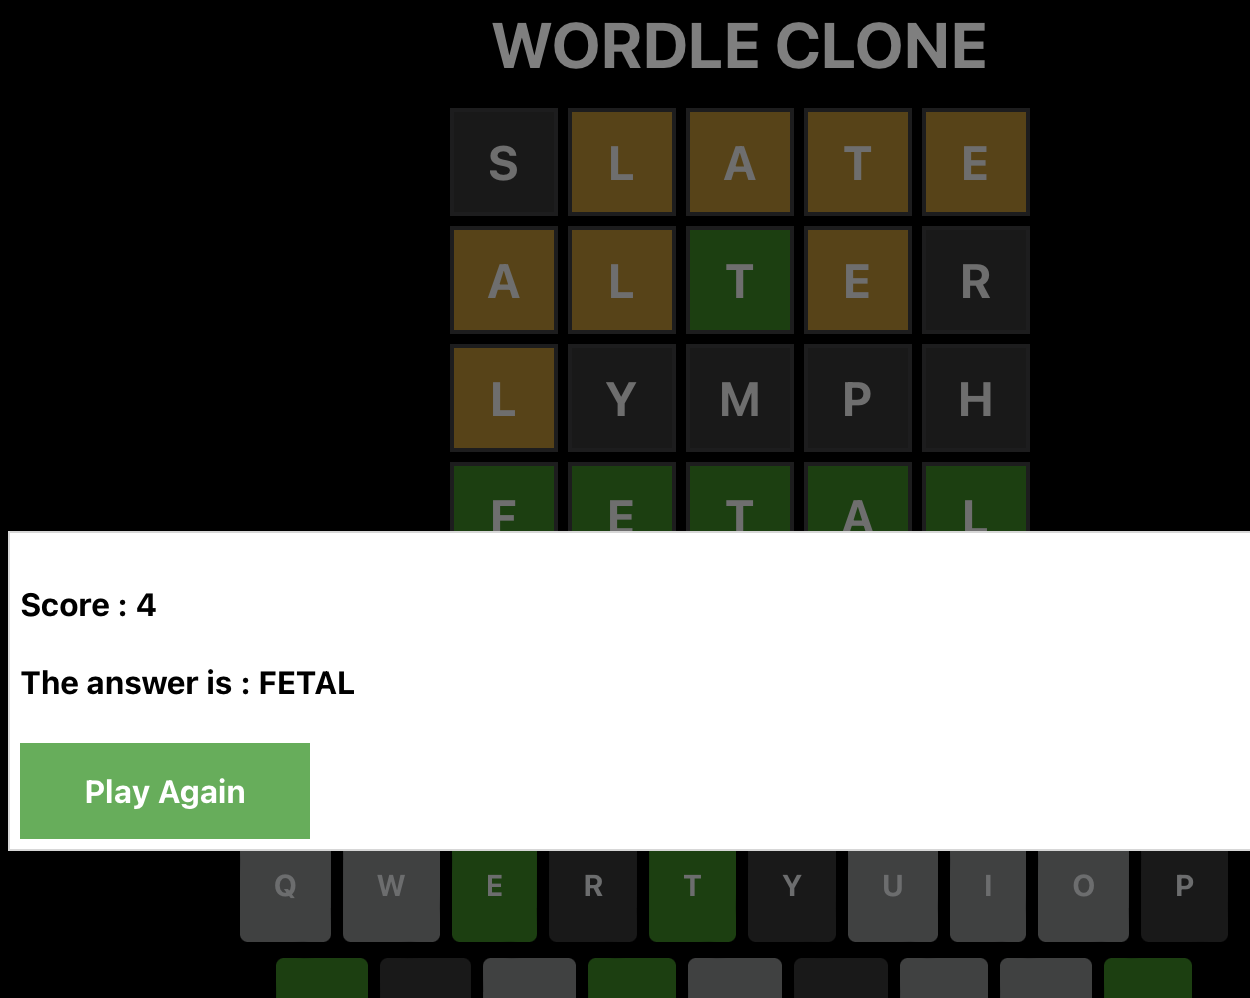

https://wordle-28581.web.app - use my wordle clone site to try out

**The below function is used to play the wordle it shows you the guess to pick**

**inputs: value - our current guess, result - output for current guess, words - set of words,turn**

**output: prints the word to try in the next guess, words - updates possible answers**

In [104]:
def suggest_word(value,result,words,turn):
    if result == [2,2,2,2,2]:
        print("We guessed it!!")
        words = get_words()
        return value,words
    if turn == 1:
        guess,words = look_up[tuple(result)]
    elif result == [0,0,0,0,0] and turn == 2:
        guess,words = look_up_guess2[tuple(result)]
        
    else:
        prob,words = information(value,result,words)
        guess = next_guess(words)
    print("Try this word:",guess)
    return guess,words

The below is demonstration with the official wordle game

In [105]:
words = get_words()
guess = 'raise'

### Use 0 - Black 1- Yellow 2- Green

In [147]:
guess,words = suggest_word(guess,[2,0,0,0,1],words,1)

Try this word: could


In [148]:
guess,words = suggest_word(guess,[0,2,0,0,1],words,2)

Try this word: rodeo


In [149]:
guess,words = suggest_word(guess,[2,2,2,2,2],words,3)

We guessed it!!


Continue if haven't guessed

In [150]:
# guess,words = suggest_word(guess,[0,0,0,0,0],words,4)

In [151]:
# guess,words = suggest_word(guess,[0,0,0,0,0],words,5)

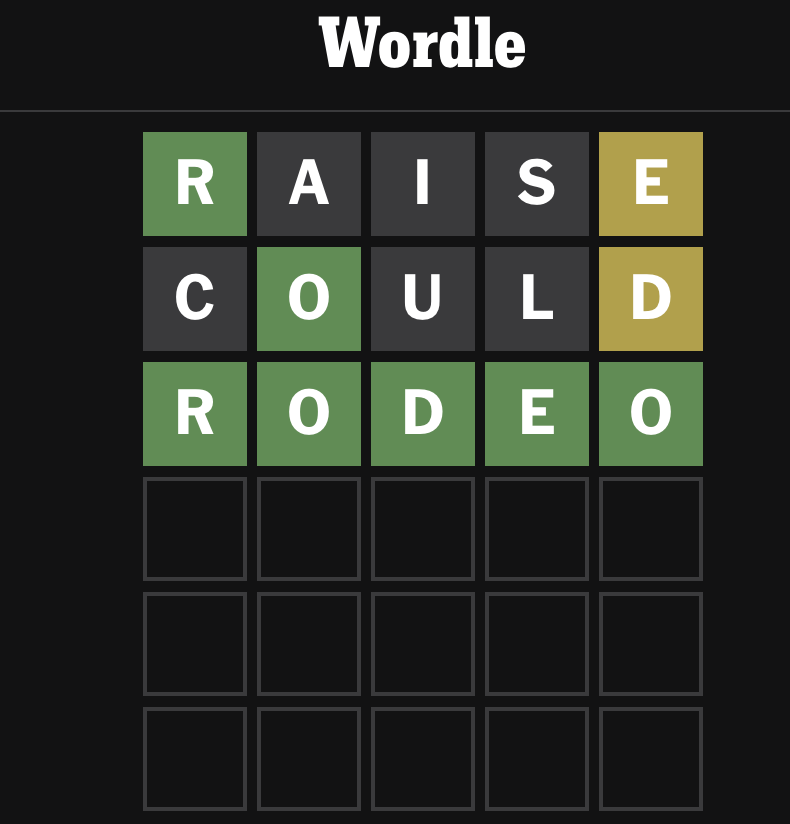

As we can see rodeo is the correct answer - Jun 25